In [1]:
dir1 = '../out/counts/'
dir2 = '../out/counts_reference/'

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
import pandas as pd

In [4]:
files1 = !find $dir1 -type f -name 'abundance.tsv'
files2 = !find $dir2 -type f -name 'abundance.tsv'

In [5]:
m1 = None
for f in files1:
    strain, replica = f.split('/')[3], f.split('/')[4]
    sample = '%s_%s' % (strain, replica)
    n = pd.read_table(f, index_col=0)['tpm']
    n.name = sample
    if m1 is None:
        m1 = n.to_frame()
    else:
        m1 = m1.join(n, how='outer')

In [6]:
m2 = None
for f in files2:
    strain, replica = f.split('/')[3], f.split('/')[4]
    sample = '%s_%s' % (strain, replica)
    n = pd.read_table(f, index_col=0)['tpm']
    n.name = sample
    if m2 is None:
        m2 = n.to_frame()
    else:
        m2 = m2.join(n, how='outer')

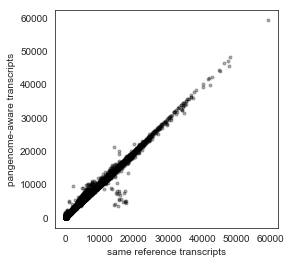

In [7]:
plt.figure(figsize=(4, 4))

idx = m1.index.intersection(m2.index)
col = m1.columns.intersection(m2.columns)

x = m2.loc[idx, col].values.flatten()
y = m1.loc[idx, col].values.flatten()

plt.plot(x, y,
         'k.',
         alpha=0.3)

plt.xlabel('same reference transcripts')
plt.ylabel('pangenome-aware transcripts');

In [8]:
m = m1.loc[idx, col] - m2.loc[idx, col]

In [9]:
m[abs(m) > 5000].stack()

target_id           
b3556      NT12393_2     7055.60
b3339      NT12150_2   -10437.32
           NT12150_1   -12324.56
           NT12393_1   -12303.61
           NT12393_2   -11931.26
           NT12167_1    -5057.92
           NT12146_1    -7868.19
           NT12146_2    -9409.96
           NT12131_1   -10445.41
           NT12131_2   -12478.09
           NT12131_3   -12732.53
           NT12089_2   -13265.14
           NT12089_4   -10705.15
           NT12089_3   -10106.04
           NT12160_1    -7731.97
           NT12160_2   -10324.87
           NT12616_1    -6876.47
           NT12197_2    -9472.62
           NT12197_1    -7662.20
           NT12193_1    -9214.65
           NT12193_2    -8315.45
b1923      NT12616_2     7164.09
dtype: float64

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>